In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
# Load the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#cleaning the data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = (df['job_skills']
                    .apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else [])
                    )

In [2]:
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

Text(0, 0.5, 'Number of Jobs')

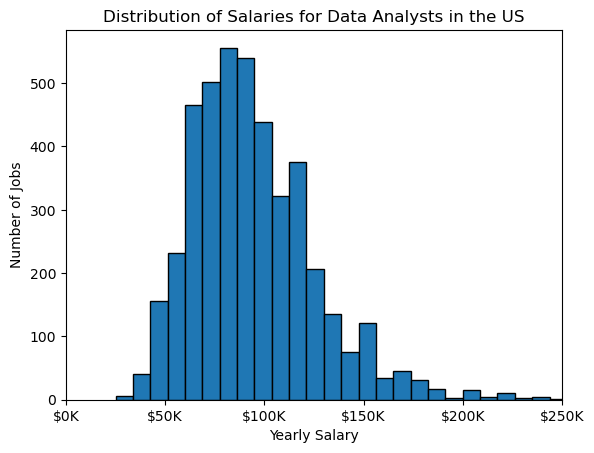

In [10]:
df_DA_US['salary_year_avg'].plot(kind = 'hist',bins=40, edgecolor='black')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K')) 
plt.xlim(0,250000)
plt.title('Distribution of Salaries for Data Analysts in the US')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')